### Analysis of CycIF data from PTCL

In [2]:
# Import librarires
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set(style="white", color_codes=True, rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
import re

# Create anndata and scanpy
import anndata as ad
import scanpy as sc
import scanpy.external as sce
#import bbknn

# Import custom functions
import wget

#### Import data

In [3]:
# Set working directory
# Laptop
WD = "/Users/aj/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"
# HMS
WD = "C:/Users/ajn16/Dropbox (Partners HealthCare)/Data/Vignesh_Lymphoma_tma/20190214_Datadump/"

os.chdir(WD)
data = pd.read_csv('PTCLCycle1to9_CytMedian_nonorm.csv', delimiter=',', index_col=0)
meta = pd.read_csv('meta_new.csv', delimiter=',',index_col=0)

In [4]:
data.head()

DAPI  BACK  CD2   TCR  DAPI02  CD4  CD3D  CD7  DAPI03  CD43   ...    \
cell_id                                                                ...     
1_1       134    62   87  1201     182  105    47   20     211    59   ...     
1_2        15     5   19   140      12   11     9    5      38     2   ...     
1_3        14     6   27   378      22   11     7    3      38    10   ...     
1_4        36    10   22   490      49   11     6    7     126     6   ...     
1_5        57    24   64  1117      68   32    22    8     218    54   ...     

         BACK.1  BCL6  DAPI12  EBVLMP  BACK.2  CD31  DAPI13  CD16  BACK.3  \
cell_id                                                                     
1_1           9    89     190     122       6     4     171    84       4   
1_2           2    19      48      10       1     2      29     9       2   
1_3           1    11      43      16       2     0      35    26       0   
1_4           2    13      95      19       2     0      60    18       0   
1_5           2    23     145      50       2     0      96    51       0   

         PSTAT3  
cell_id          
1_1          13  
1_2           3  
1_3           0  
1_4           2  
1_5           0  

[5 rows x 52 columns]

In [5]:
meta.head()

core     Disease    StudyID  patient
cell_id                                      
1_1         1  ALCL, ALK-  TMA335_32        1
1_2         1  ALCL, ALK-  TMA335_32        1
1_3         1  ALCL, ALK-  TMA335_32        1
1_4         1  ALCL, ALK-  TMA335_32        1
1_5         1  ALCL, ALK-  TMA335_32        1

In [25]:
# custom normalization
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
data = mi_pp_normalize (data)

Applying log transformation and quantile normalization...


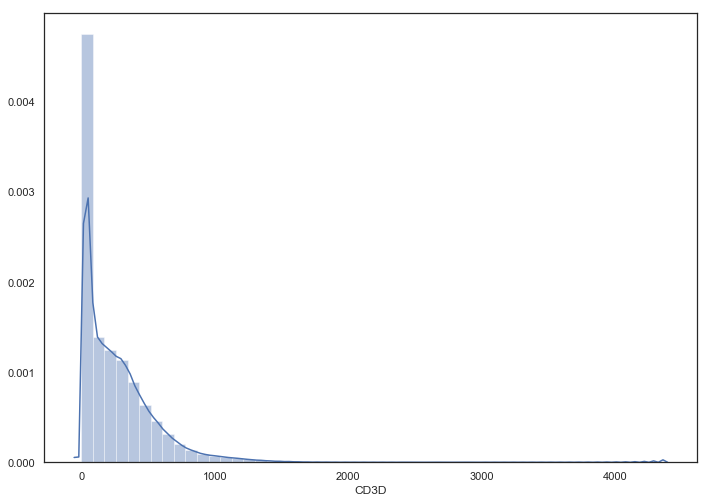

In [24]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data["CD3D"])
plt.savefig("fig/befornorm.png")

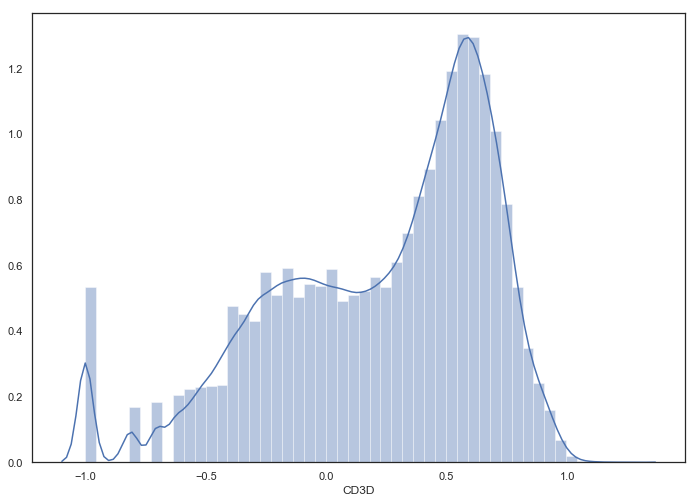

In [27]:
sns.distplot(data["CD3D"])
plt.savefig("fig/afternorm.png")

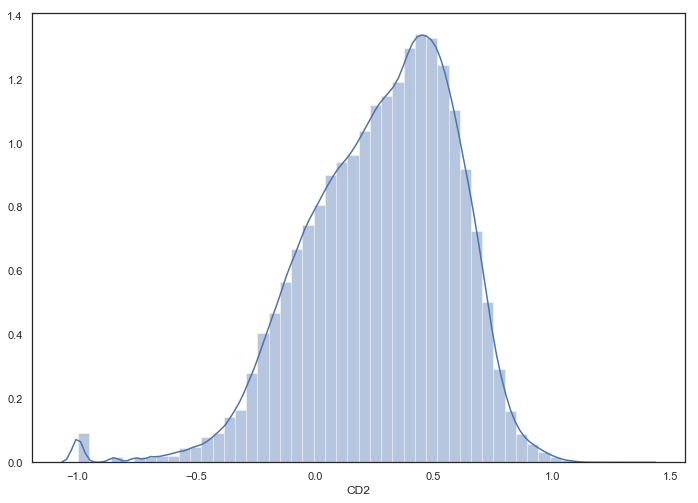

In [78]:
# Subset the cells of intrest and view distibution of log normalised data
#y = data5.index
#data6 = data2.loc[ y , : ]
#data6.shape
sns.distplot(data["CD2"])
plt.savefig("fig/CD2.png")

In [150]:
data8 = data2[(data2.CD3D < -0.5) | (data2.CD3D > 0.5)]
data8.shape

(297818, 52)

In [294]:
# Remove non-bimodal genes
d = data
#goi = ['TCR', 'CD30', 'KER', 'GATA3', 'CD21', 'ERK']
#d = d.drop (goi, axis = 1)

# Manual clipping of non-expressing genes
d.CD2[d.CD2 < -2] = 0
d.CD4[d.CD4 < 0] = 0
d.CD3D[d.CD3D < 0] = 0
d.CD7[d.CD7 < 0] = 0
d.CD43[d.CD43 < -2] = 0
d.ALK[d.ALK < -1] = 0
d.CD45[d.CD45 < -1] = 0
d.KI67[d.KI67 < -1.3] = 0
d.CD5[d.CD5 < -1] = 0
d.FOXP3[d.FOXP3 < -2] = 0
d.CD8[d.CD8 < -1.5] = 0
d.CD68[d.CD68 < -1.8] = 0
d.CD20[d.CD20 < 0.6] = 0
d.CD163[d.CD163 < -2] = 0
d.PDL1[d.PDL1 < -1.8] = 0
d.CD56[d.CD56 < -1] = 0
d.PD1[d.PD1 < -1] = 0
d.CD206[d.CD206 < -0.8] = 0
d.S6P[d.S6P < -1] = 0
d.TBET[d.TBET < 0] = 0

In [295]:
from scipy.stats import zscore
d = d.apply(zscore)

In [3]:
# Read
adata = sc.read("adata_ptcl.h5ad")

In [21]:
# Save
adata.write("atcl.h5ad")

#### Look at the head of data

#### Remove DAPI and background channels

In [6]:
# Drop DAPI
data = data.drop(list(data.filter(regex='DAPI|BACK', axis=1)), axis=1)
data.head()

CD2   TCR  CD4  CD3D  CD7  CD43  ALK  CD45  CD10  KI67   ...    CD21  \
cell_id                                                           ...           
1_1       87  1201  105    47   20    59   24   225    80    30   ...      69   
1_2       19   140   11     9    5     2    3    10    10     0   ...       4   
1_3       27   378   11     7    3    10    2   121    11    20   ...      21   
1_4       22   490   11     6    7     6    6    76    14    39   ...      10   
1_5       64  1117   32    22    8    54   12   443    38    33   ...      44   

         S6P  ERK  TBET  TDT  BCL6  EBVLMP  CD31  CD16  PSTAT3  
cell_id                                                         
1_1       41   16    28  100    89     122     4    84      13  
1_2        8    3     3   16    19      10     2     9       3  
1_3        3    2     5   15    11      16     0    26       0  
1_4        9    3    10   20    13      19     0    18       2  
1_5       20    7    23   60    23      50     0    51       0  

[5 rows x 35 columns]

In [7]:
# Convert to AnnData 
adata = ad.AnnData(data)

In [8]:
# Attach meta data with Anndata
adata.obs = meta

In [22]:
adata.obs

core     Disease    StudyID patient
cell_id                                     
1_1         1  ALCL, ALK-  TMA335_32       1
1_2         1  ALCL, ALK-  TMA335_32       1
1_3         1  ALCL, ALK-  TMA335_32       1
1_4         1  ALCL, ALK-  TMA335_32       1
1_5         1  ALCL, ALK-  TMA335_32       1
1_6         1  ALCL, ALK-  TMA335_32       1
1_7         1  ALCL, ALK-  TMA335_32       1
1_8         1  ALCL, ALK-  TMA335_32       1
1_9         1  ALCL, ALK-  TMA335_32       1
1_10        1  ALCL, ALK-  TMA335_32       1
1_11        1  ALCL, ALK-  TMA335_32       1
1_12        1  ALCL, ALK-  TMA335_32       1
1_13        1  ALCL, ALK-  TMA335_32       1
1_14        1  ALCL, ALK-  TMA335_32       1
1_15        1  ALCL, ALK-  TMA335_32       1
1_16        1  ALCL, ALK-  TMA335_32       1
1_17        1  ALCL, ALK-  TMA335_32       1
1_18        1  ALCL, ALK-  TMA335_32       1
1_19        1  ALCL, ALK-  TMA335_32       1
1_20        1  ALCL, ALK-  TMA335_32       1
1_21        1  ALCL, ALK-  TMA335_32       1
1_22        1  ALCL, ALK-  TMA335_32       1
1_23        1  ALCL, ALK-  TMA335_32       1
1_24        1  ALCL, ALK-  TMA335_32       1
1_25        1  ALCL, ALK-  TMA335_32       1
1_26        1  ALCL, ALK-  TMA335_32       1
1_27        1  ALCL, ALK-  TMA335_32       1
1_28        1  ALCL, ALK-  TMA335_32       1
1_29        1  ALCL, ALK-  TMA335_32       1
1_30        1  ALCL, ALK-  TMA335_32       1
...       ...         ...        ...     ...
306_3908  306     Control     Tonsil     102
306_3909  306     Control     Tonsil     102
306_3910  306     Control     Tonsil     102
306_3911  306     Control     Tonsil     102
306_3912  306     Control     Tonsil     102
306_3913  306     Control     Tonsil     102
306_3914  306     Control     Tonsil     102
306_3915  306     Control     Tonsil     102
306_3916  306     Control     Tonsil     102
306_3917  306     Control     Tonsil     102
306_3918  306     Control     Tonsil     102
306_3919  306     Control     Tonsil     102
306_3920  306     Control     Tonsil     102
306_3921  306     Control     Tonsil     102
306_3922  306     Control     Tonsil     102
306_3923  306     Control     Tonsil     102
306_3924  306     Control     Tonsil     102
306_3925  306     Control     Tonsil     102
306_3926  306     Control     Tonsil     102
306_3927  306     Control     Tonsil     102
306_3928  306     Control     Tonsil     102
306_3929  306     Control     Tonsil     102
306_3930  306     Control     Tonsil     102
306_3931  306     Control     Tonsil     102
306_3932  306     Control     Tonsil     102
306_3933  306     Control     Tonsil     102
306_3934  306     Control     Tonsil     102
306_3935  306     Control     Tonsil     102
306_3936  306     Control     Tonsil     102
306_3937  306     Control     Tonsil     102

[681460 rows x 4 columns]

In [13]:
# Remove markers after cycle 10
#adata = adata[:,0:26]
# Remove other identified bad markers
columns = ['CD10', 'CD56', 'CD11B', 'FOXP3', 'GATA3', 'ERK', 'BCL6', 'EBVLMP']
remove = np.in1d(adata.var_names, columns)
adata = adata[:, ~remove]

In [14]:
# Covert patient column into string 
adata.obs['patient'] = adata.obs['patient'].astype(str)
adata.obs['core'] = adata.obs['core'].astype(str)

In [15]:
adata

AnnData object with n_obs × n_vars = 681460 × 27 
    obs: 'core', 'Disease', 'StudyID', 'patient'

... storing 'core' as categorical
... storing 'Disease' as categorical
... storing 'StudyID' as categorical
... storing 'patient' as categorical


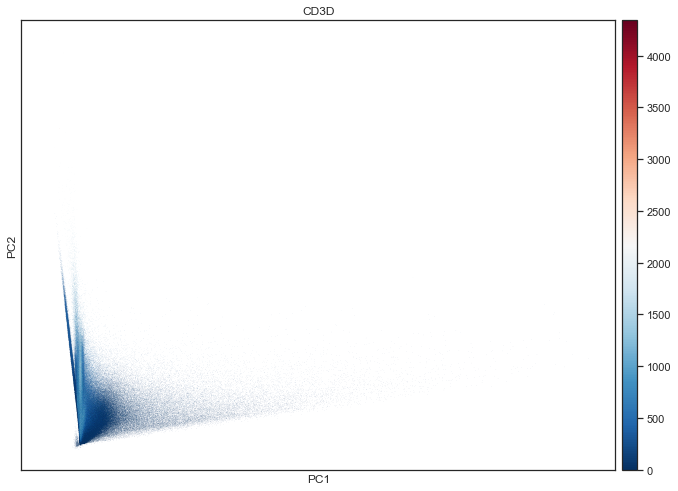

In [16]:
# Calculate PCA
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='CD3D', color_map="RdBu_r")

In [23]:
p1 = adata[adata.obs['Disease'].isin(['Angioimmunoblastic Cell Lymphoma'])]

In [24]:
p1

View of AnnData object with n_obs × n_vars = 86954 × 27 
    obs: 'core', 'Disease', 'StudyID', 'patient'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [25]:
adata = adata[adata.obs['core'] == "109"]


View of AnnData object with n_obs × n_vars = 6466 × 27 
    obs: 'core', 'Disease', 'StudyID', 'patient'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [26]:
sc.pp.filter_cells(adata, min_genes=27)

In [29]:
sc.pp.log1p(adata)
#adata.raw = adata

In [31]:
d = pd.DataFrame(adata.X, index = adata.obs.index, columns=adata.var.index)
d.to_csv("atcl_109.csv", sep=',')

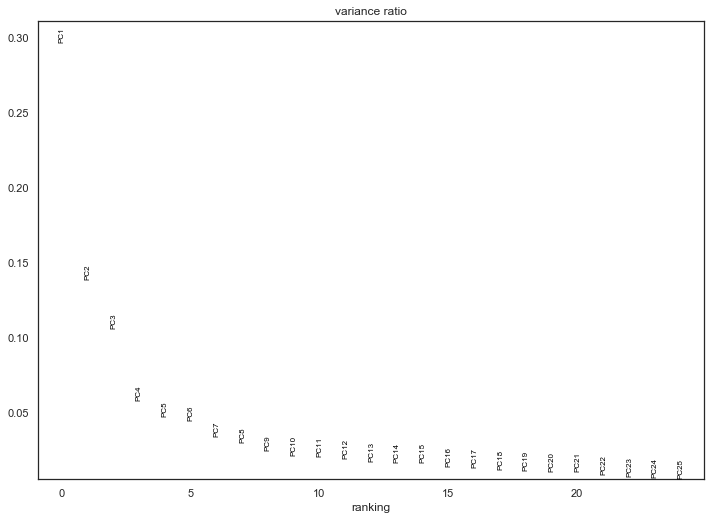

In [92]:
sc.pl.pca_variance_ratio(adata)

In [100]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=7)
sc.tl.umap(adata)

saving figure to file ./figures/umapadata_CD3D.png


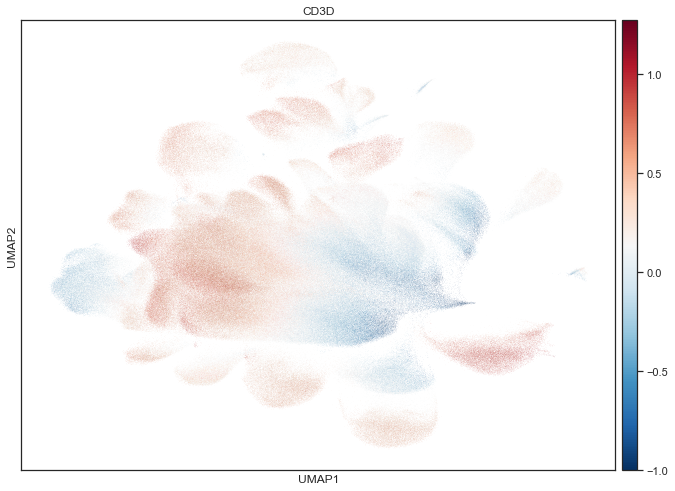

In [107]:
sc.pl.umap(adata,color='CD3D', color_map="RdBu_r", save='adata_CD3D.png')

### Subset data

In [9]:
p1 = adata[adata.obs['core'].isin(['151'])]
p1

View of AnnData object with n_obs × n_vars = 6802 × 23 
    obs: 'core', 'Disease', 'StudyID', 'patient'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

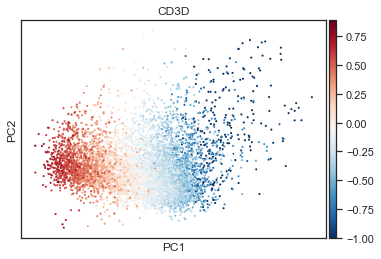

In [10]:
# Calculate PCA
sc.tl.pca(p1, svd_solver='arpack')
sc.pl.pca(p1, color='CD3D', color_map="RdBu_r")


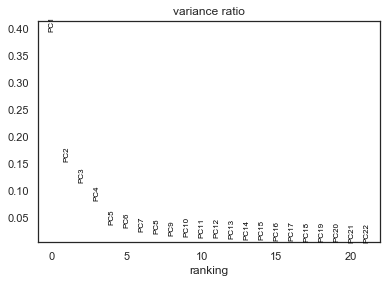

In [11]:
sc.pl.pca_variance_ratio(p1)

In [12]:
# UMAP
sc.pp.neighbors(p1, n_neighbors=30, n_pcs=7)

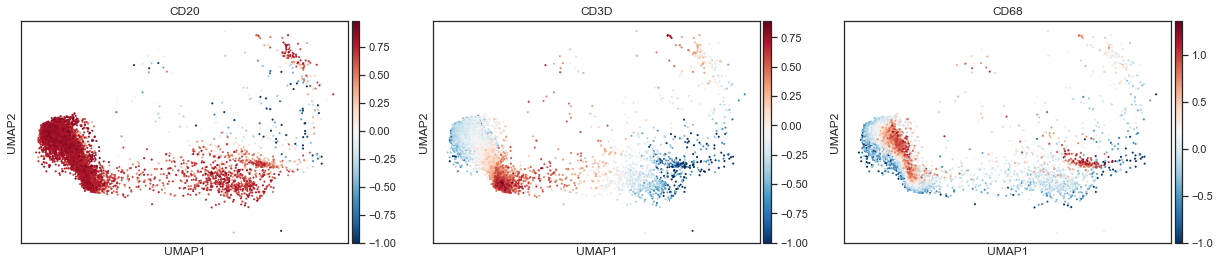

In [15]:
#sc.tl.umap(p1)
sc.pl.umap(p1, color=['CD20', 'CD3D', 'CD68'], color_map="RdBu_r")

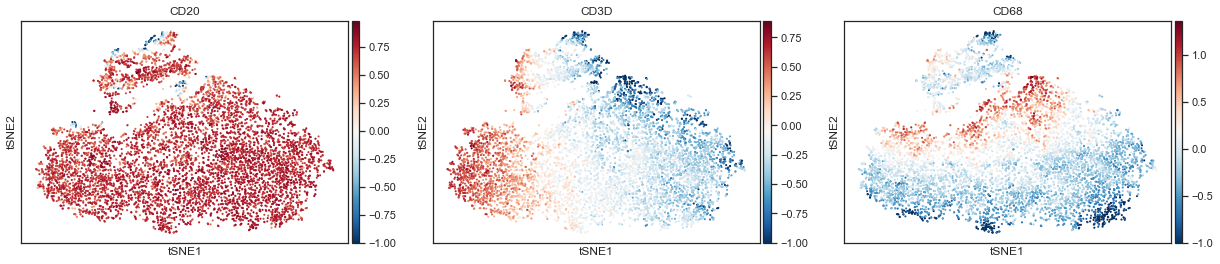

In [16]:
sc.tl.tsne(p1)
sc.pl.tsne(p1, color=['CD20', 'CD3D', 'CD68'], color_map="RdBu_r")

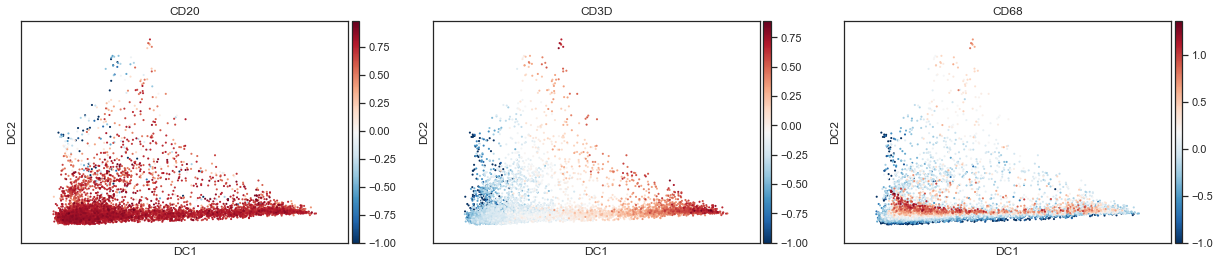

In [17]:
sc.tl.diffmap(p1)
sc.pl.diffmap(p1, color=['CD20', 'CD3D', 'CD68'], color_map="RdBu_r")

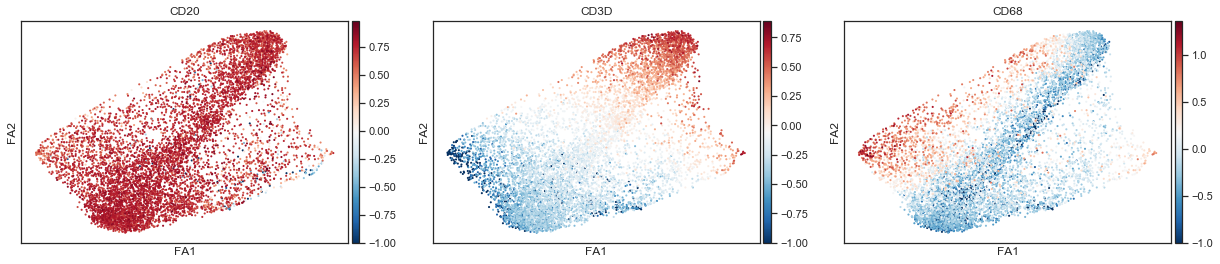

In [18]:
#sc.tl.draw_graph(p1)
sc.pl.draw_graph(p1, color=['CD20', 'CD3D', 'CD68'], color_map="RdBu_r")

saving figure to file ./figures/draw_graph_fatonsil.png


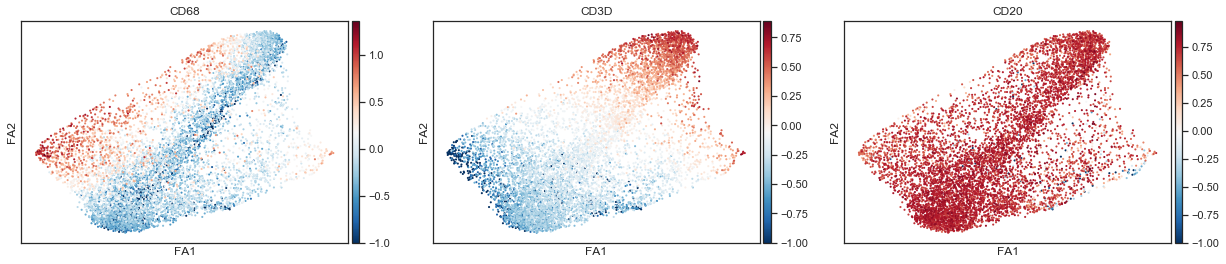

In [6]:
sc.pl.draw_graph(p1, color=['CD68','CD3D', 'CD20'], color_map="RdBu_r", save='tonsil.png')

In [6]:
# Clustering
#sc.tl.leiden(p1)
sc.tl.louvain(p1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

saving figure to file ./figures/draw_graph_falouvain.png


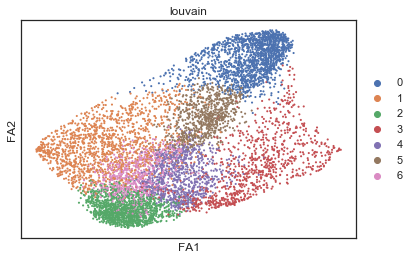

In [5]:
sc.pl.draw_graph(p1, color=['louvain'], color_map="RdBu_r", save='louvain.png')

/Users/aj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/aj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


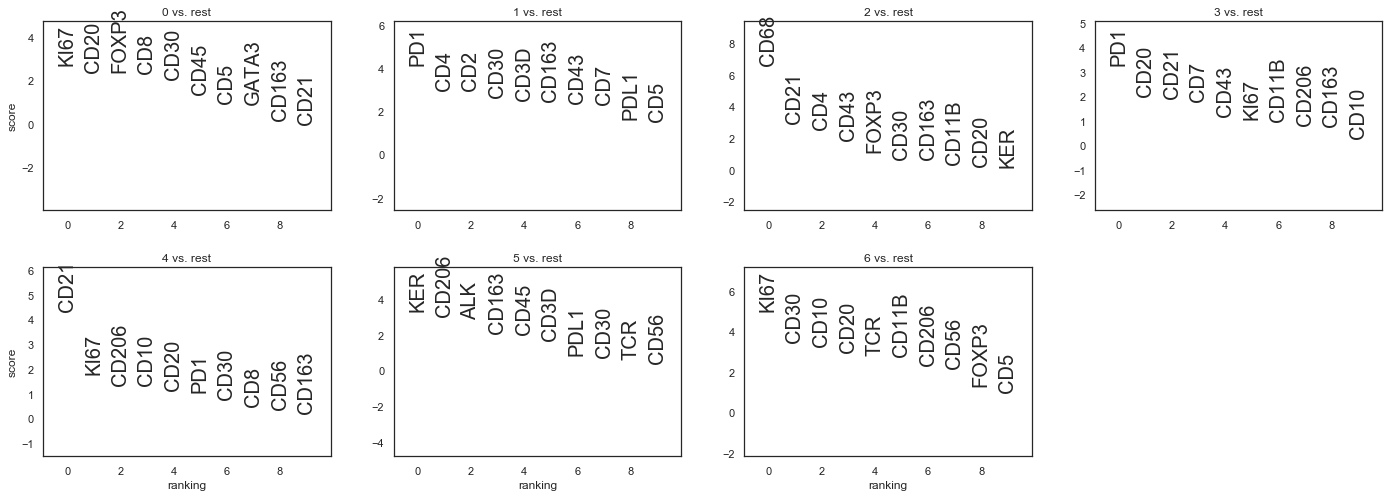

In [20]:
# Rank genes
sc.tl.rank_genes_groups(p1, 'louvain', method='logreg')
sc.pl.rank_genes_groups(p1, n_genes=10, sharey=False, fontsize = 20, save='generank.png')

saving figure to file ./figures/rank_genes_groups_louvainmarkergenes.png


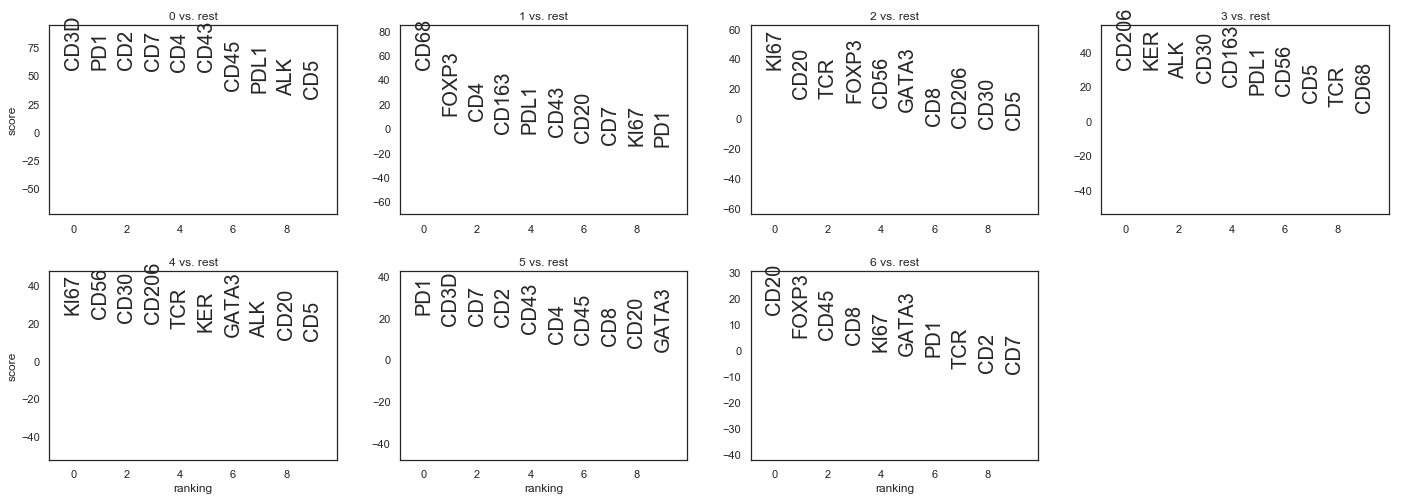

In [7]:
# Rank genes
sc.tl.rank_genes_groups(p1, 'louvain', method='wilcoxon')
sc.pl.rank_genes_groups(p1, n_genes=10, sharey=False, fontsize= 20, save='markergenes.png')

In [8]:
new_cluster_names = [
    'T cells', 'Macrophages',
    'B Cells', 'M2 Macrophages',
    'NK cells', 'T cells-2',
    'B cells- 2']
p1.rename_categories('louvain', new_cluster_names)

saving figure to file ./figures/draw_graph_fap1_louvainomndata.png


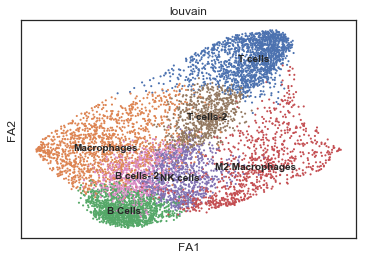

In [9]:
sc.pl.draw_graph(p1, color=['louvain'], legend_loc = 'on data', save='p1_louvainomndata.png')

saving figure to file ./figures/dotplotp1_dotplot.png


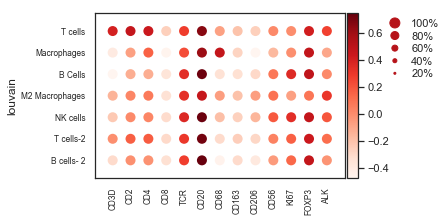

In [10]:
marker_genes = ['CD3D', 'CD2', 'CD4', 'CD8', 'TCR', 'CD20', 'CD68', 'CD163', 'CD206', 'CD56', 'KI67', 'FOXP3', 'ALK']
ax = sc.pl.dotplot(p1, marker_genes, groupby='louvain', save='p1_dotplot.png')

saving figure to file ./figures/stacked_violinp1_violinplot.png


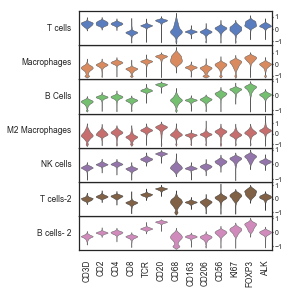

In [11]:
ax = sc.pl.stacked_violin(p1, marker_genes, groupby='louvain', rotation=90, save='p1_violinplot.png')

### Batch correction

In [4]:
p1 = sc.read("p1.h5ad")
#p1.write("p1.h5ad")

Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 


saving figure to file ./figures/umapp1_bbknn.png


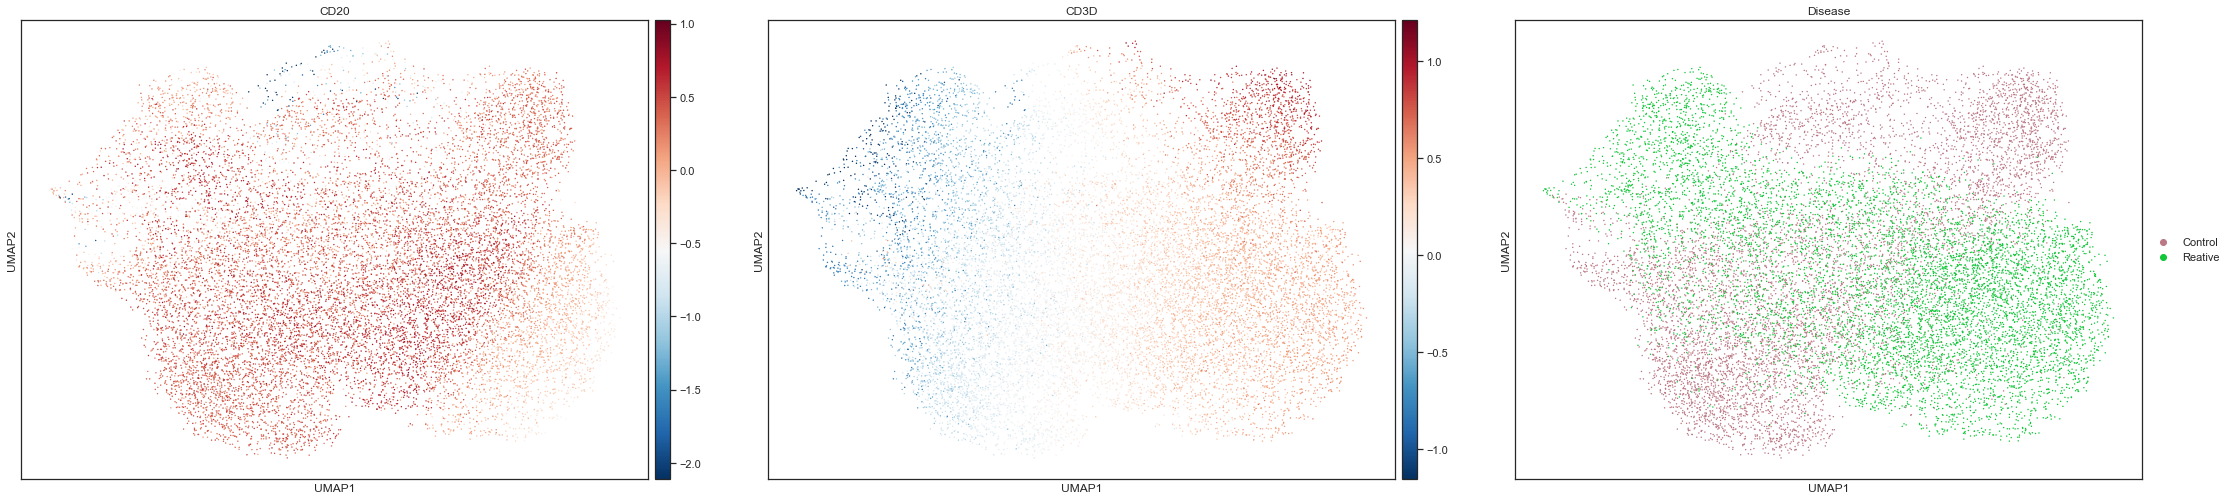

In [50]:
# bbknn method
adata_bbknn = bbknn.bbknn(p1, neighbors_within_batch=10, n_pcs=7, copy=True, batch_key='Disease')
sc.pp.neighbors(adata_bbknn, n_neighbors=30, n_pcs=7)
sc.tl.umap(adata_bbknn)
#sc.tl.louvain(adata_bbknn)

sc.pl.umap(adata_bbknn, color=['CD20', 'CD3D', 'Disease'], color_map="RdBu_r")

saving figure to file ./figures/draw_graph_fabbknn.png


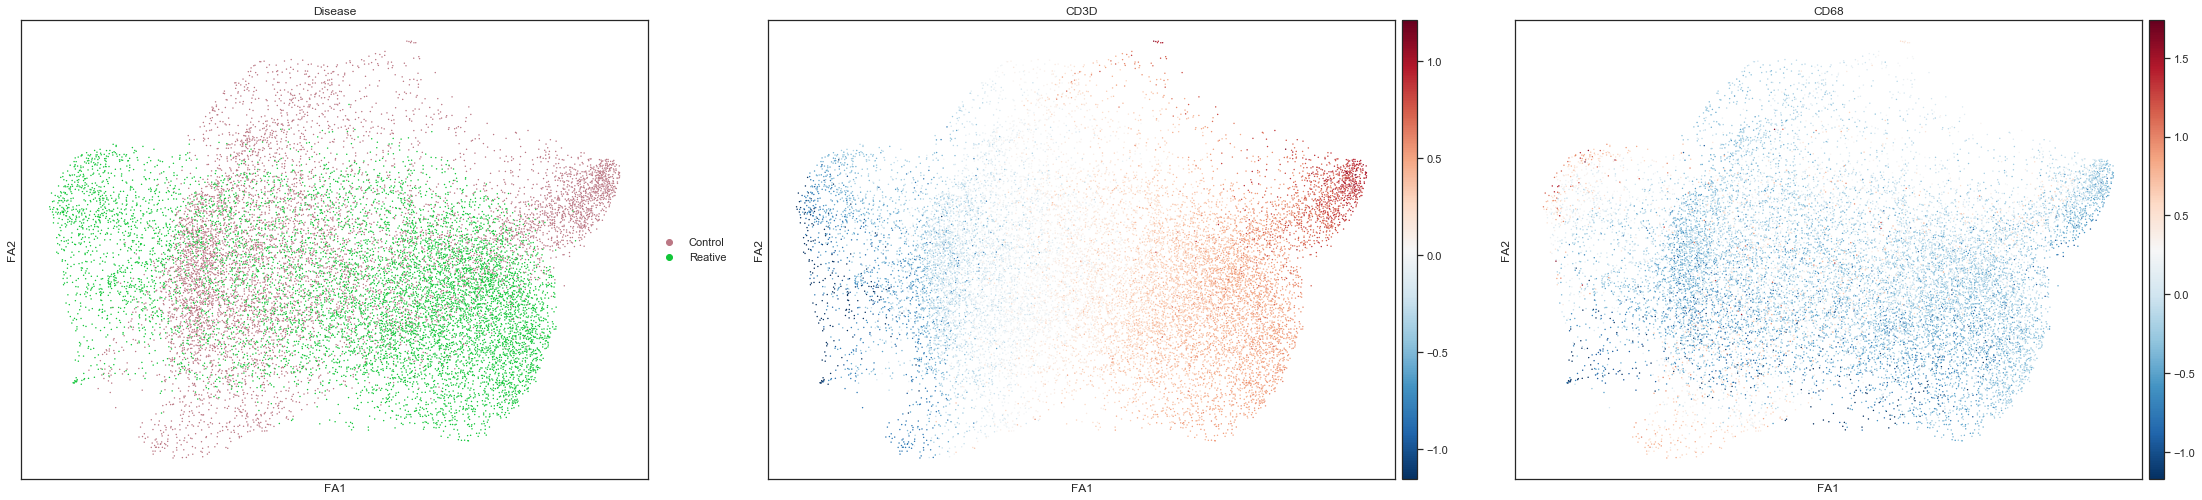

In [52]:
sc.tl.draw_graph(adata_bbknn)
sc.pl.draw_graph(adata_bbknn, color=['Disease', 'CD3D', 'CD68'], color_map="RdBu_r", save='bbknn.png')

Standardizing Data across genes.
found 2 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments


Adjusting data


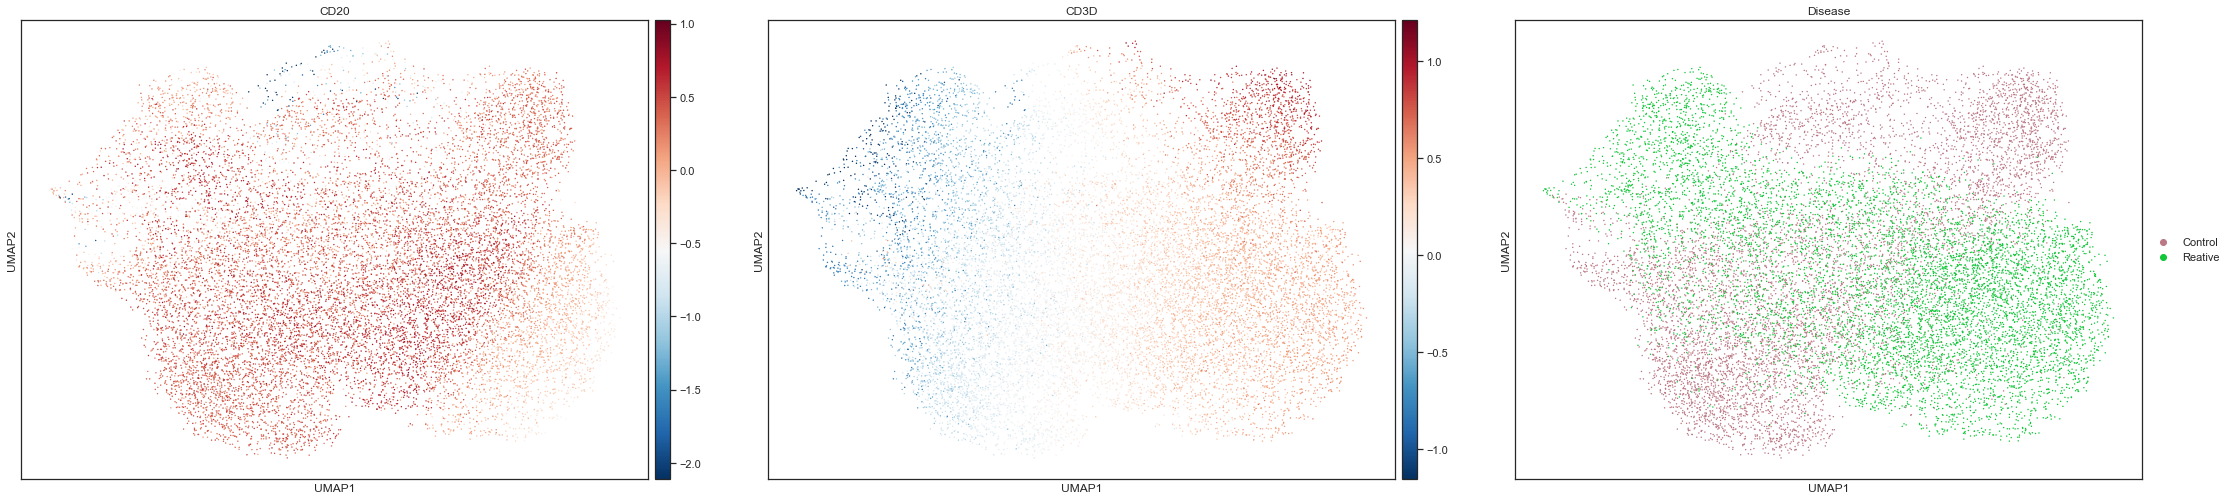

In [49]:
# Combat method
adata_combat = p1
sc.pp.combat(adata_combat, key='Disease')
sc.pp.neighbors(adata_combat, n_neighbors=30, n_pcs=7)
sc.tl.umap(adata_combat)
sc.pl.umap(adata_combat, color=['CD20', 'CD3D', 'Disease'], color_map="RdBu_r")

saving figure to file ./figures/draw_graph_facombat.png


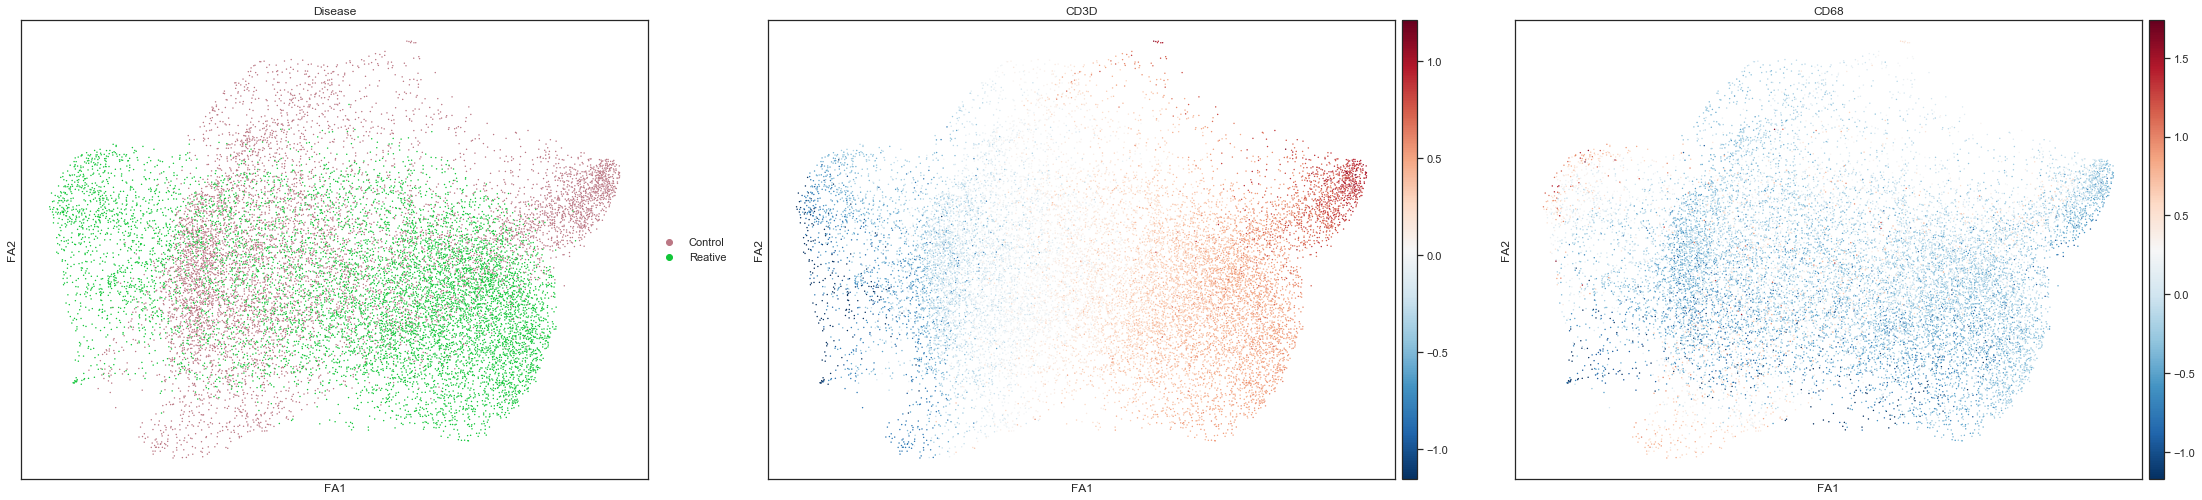

In [53]:
sc.tl.draw_graph(adata_combat)
sc.pl.draw_graph(adata_combat, color=['Disease', 'CD3D', 'CD68'], color_map="RdBu_r", save='combat.png')

In [54]:
# MNN method
s1 = p1[p1.obs['Disease'].isin(['Control'])]
s2 = p1[p1.obs['Disease'].isin(['Reative'])]

c = sce.pp.mnn_correct(s1,s2, batch_key='Disease')
p2 = c[0]
# UMAP
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=7)
#sc.tl.umap(p2)
#sc.pl.umap(p2, color=['CD20', 'CD3D', 'Disease'], color_map="RdBu_r", save='p1_mnn.png')

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...


Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 
Up to anndata 0.6.12, `.copy()` cast a non-'float32' `.X` to 'float32'. Now, the dtype 'float64' is maintained. 


  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.


... storing 'StudyID' as categorical
... storing 'core' as categorical
... storing 'patient' as categorical
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


saving figure to file ./figures/draw_graph_famnn.png


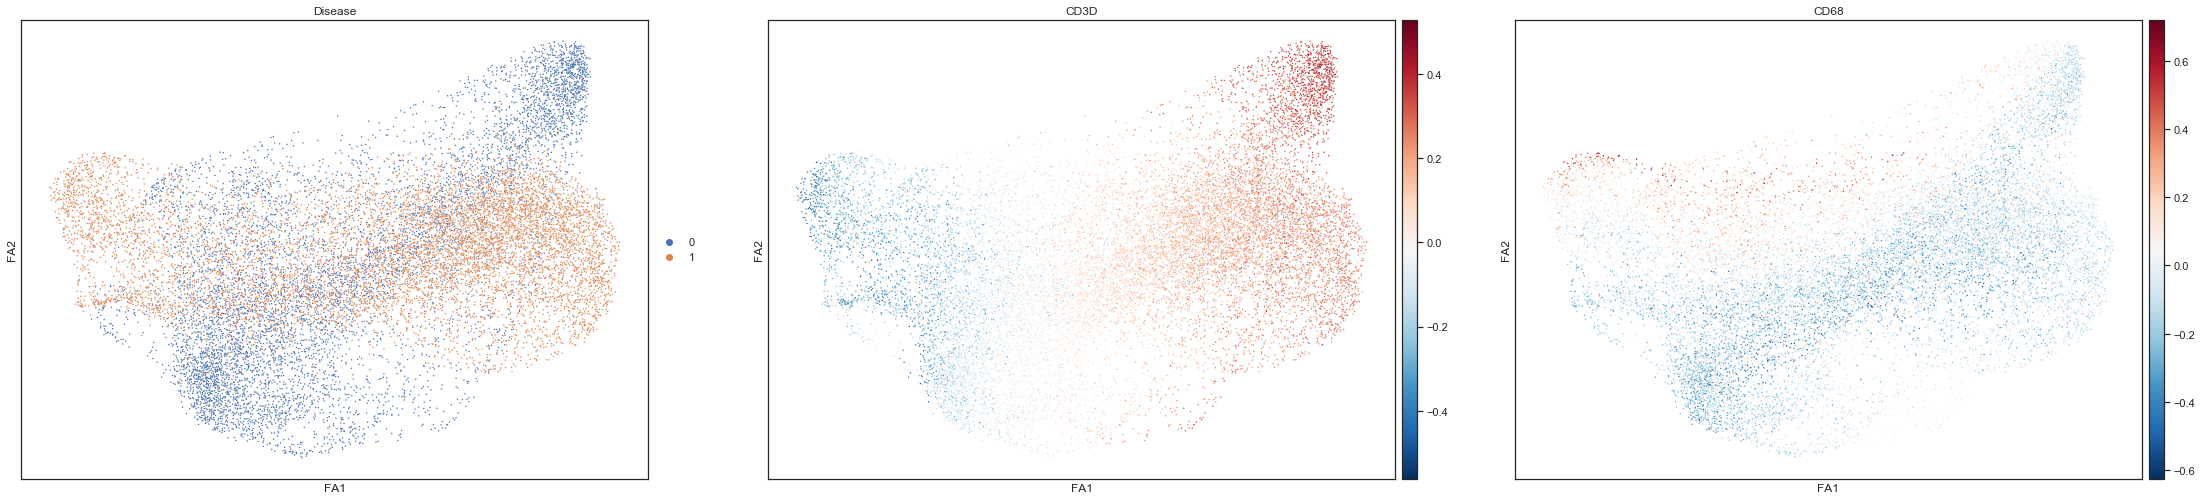

In [55]:
sc.tl.draw_graph(p2)
sc.pl.draw_graph(p2, color=['Disease', 'CD3D', 'CD68'], color_map="RdBu_r", save='mnn.png')

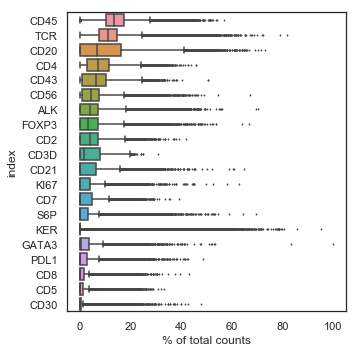

In [19]:
sc.pl.highest_expr_genes(adata_bbknn, n_top=20)

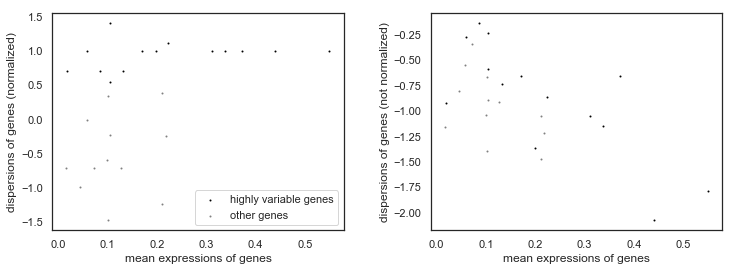

In [49]:
sc.pp.highly_variable_genes(adata_bbknn, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata_bbknn)

In [50]:
adata_bbknn

AnnData object with n_obs × n_vars = 151376 × 26 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'neighbors', 'pca', 'core_colors', 'patient_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [57]:
p2 = adata_bbknn[:, adata_bbknn.var['highly_variable']]

In [58]:
p2.var.index

Index(['TCR', 'CD4', 'CD3D', 'CD43', 'ALK', 'CD45', 'KI67', 'CD8', 'CD20',
       'CD30', 'KER', 'PD1', 'CD21', 'TBET'],
      dtype='object', name='index')

In [59]:
# Remove other identified bad markers
c = ['CD45', 'ALK', 'KI67', 'KER', 'PD1', 'TBET']
r = np.in1d(p2.var_names, c)
p2 = p2[:, ~r]
p2.var.index

Index(['TCR', 'CD4', 'CD3D', 'CD43', 'CD8', 'CD20', 'CD30', 'CD21'], dtype='object', name='index')

In [60]:
p2

View of AnnData object with n_obs × n_vars = 151376 × 8 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

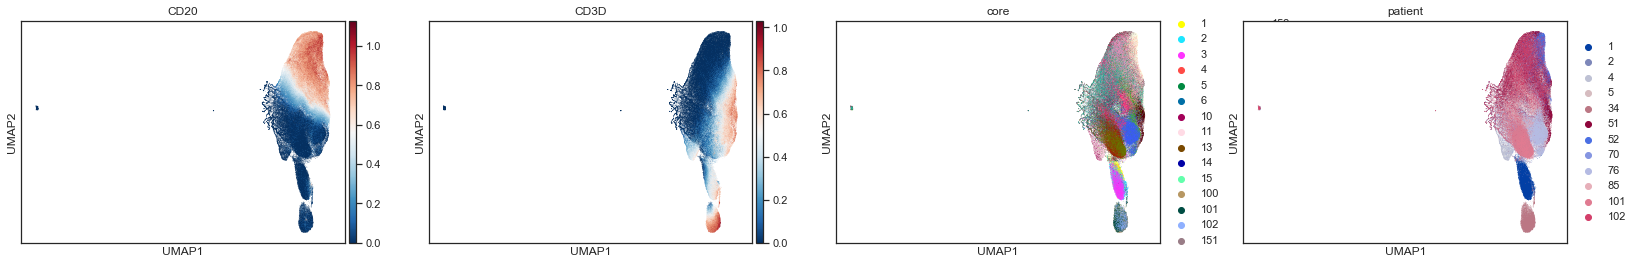

In [61]:
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=8)
sc.tl.umap(p2)
sc.pl.umap(p2, color=['CD20', 'CD3D', 'core', 'patient'], color_map="RdBu_r")

In [28]:
import leidenalg
sc.tl.leiden(adata)

In [32]:
sc.tl.leiden(adata_bbknn)
adata_bbknn

AnnData object with n_obs × n_vars = 151376 × 26 
    obs: 'core', 'patient', 'StudyID', 'Tissue', 'DX', 'DX_trim', 'code', 'leiden'
    uns: 'neighbors', 'pca', 'core_colors', 'patient_colors', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

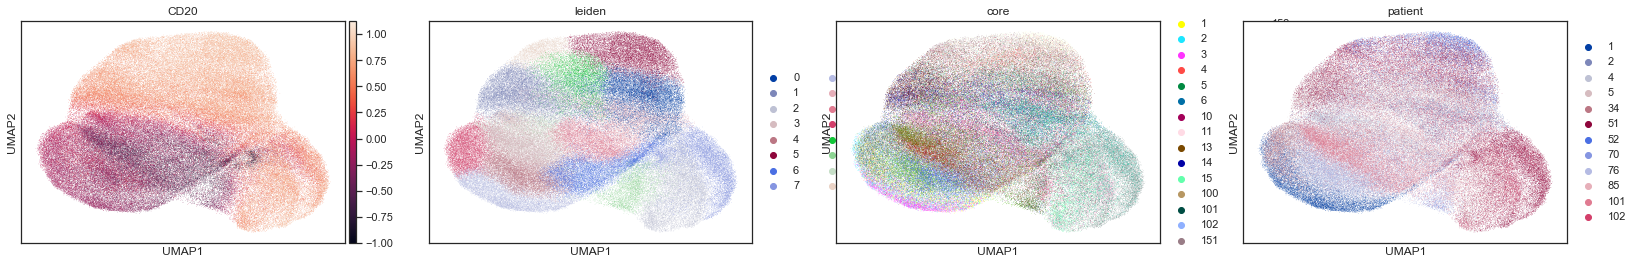

In [33]:
sc.pl.umap(adata_bbknn, color=['CD20', 'leiden', 'core', 'patient'])

In [92]:
s1 = adata[adata.obs['cores'].isin(['1'])]
s2 = adata[adata.obs['cores'].isin(['2'])]
s3 = adata[adata.obs['cores'].isin(['3'])]
s4 = adata[adata.obs['cores'].isin(['4'])]
s5 = adata[adata.obs['cores'].isin(['5'])]
s6 = adata[adata.obs['cores'].isin(['6'])]

In [93]:
c = sce.pp.mnn_correct(s1,s2,s3,s4,s5,s6, batch_key='cores')

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 5: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 5: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 3 of 5: processing batch 3
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 4 of 5: processing batch 4
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 5 of 5: processing batch 5
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.


In [94]:
p2 = c[0]

In [97]:
# UMAP
sc.pp.neighbors(p2, n_neighbors=30, n_pcs=5)
sc.tl.umap(p2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

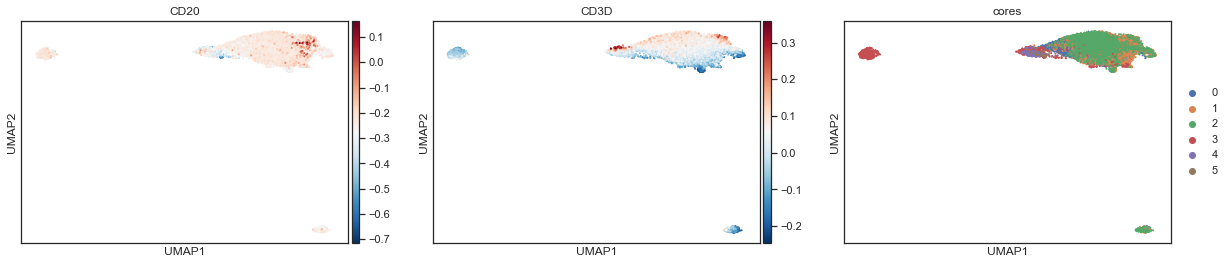

AttributeError: 'NoneType' object has no attribute 'ylim'

In [106]:
#ax.set(ylim=(-1, 1))
sc.pl.umap(p2, color=['CD20', 'CD3D', 'cores'], color_map="RdBu_r")

In [148]:
p = adata[adata.obs['cores'].isin(['1','2','3','4','5','6','7','8','9','10',
                                  '11','12','13','14','15','16','17','18','19','20',
                                  '21','22','23','24','25','26','27','28','29','30',
                                  '31','32','33','34','35','36','37','38','39','40'])]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

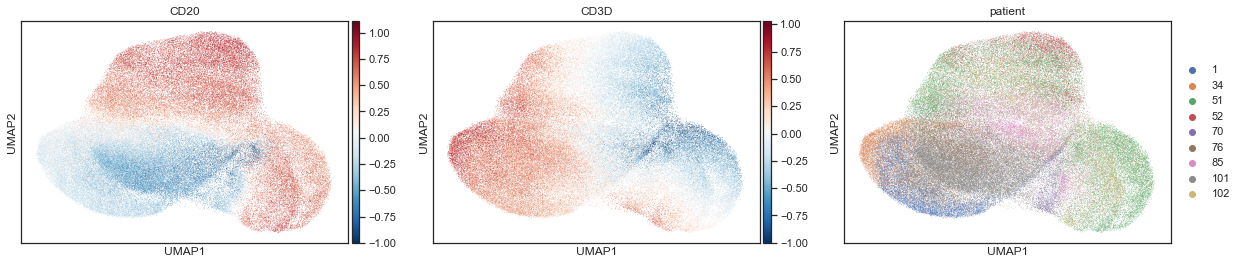

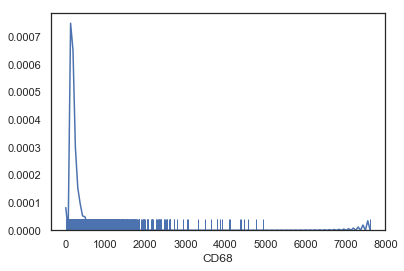

In [44]:
sns.distplot(data['CD68'], hist=False, rug=True)

#### Normalize based on custom methiod

In [45]:
file_url = 'https://raw.githubusercontent.com/ajitjohnson/Jupyter-Notebooks/master/py_scripts/mi_pp_normalize.py'
exec(open(wget.download(file_url)).read())
data_nn = mi_pp_normalize (data)

Applying log transformation and quantile normalization...


In [47]:
# Drop DAPI
data_nn = data_nn.drop(list(data_nn.filter(regex='DAPI|BACK', axis=1)), axis=1)

CD2       TCR      CD4      CD3D      CD7     CD43       ALK  \
ID                                                                       
1_1 -0.406640  0.231810 -0.61038 -0.245100 -0.39460 -0.35536 -0.410740   
1_2 -0.208120  0.353310 -0.40702 -0.143160 -0.32192 -0.40222 -0.457840   
1_3 -0.345370  0.028613 -0.46394 -0.186560 -0.37300 -0.20602 -0.524310   
1_4 -0.120140  0.219100 -0.35657 -0.072530 -0.30623  0.01909 -0.229020   
1_5 -0.031985 -0.049000 -0.19408 -0.050959 -0.28056 -0.22607  0.057713   

         CD45      CD10      KI67   ...        CD21      S6P      ERK  \
ID                                  ...                                 
1_1 -0.058780 -0.990550 -0.075095   ...    -0.39021 -0.54668 -0.54125   
1_2 -0.026391 -0.548220 -0.116100   ...    -0.34019 -0.43913 -0.62656   
1_3  0.073478 -0.816200  0.071263   ...    -0.38670 -0.50294 -0.68652   
1_4  0.155930 -0.260930 -0.051495   ...    -0.29164 -0.39117 -0.31303   
1_5  0.243970 -0.041982 -0.101010   ...    -0.32303 -0.37833  0.12395   

         TBET      TDT     BCL6    EBVLMP     CD31      CD16   PSTAT3  
ID                                                                     
1_1  0.068790 -0.94468 -0.88867 -0.365380 -0.37063 -0.517090 -0.27502  
1_2  0.351130 -0.41090 -0.69078 -0.158590 -0.36016 -0.296570 -0.23356  
1_3 -0.032020 -0.66349 -0.69435 -0.355140 -0.37063 -0.376790 -0.22695  
1_4  0.150620 -0.50284 -0.58655  0.217390 -0.34998 -0.121790 -0.17680  
1_5 -0.061973 -0.20285 -0.45637  0.064211 -0.34009  0.028438 -0.12005  

[5 rows x 35 columns]

In [49]:
# Convert to AnnData 
adata_n = sc.AnnData(data_nn)

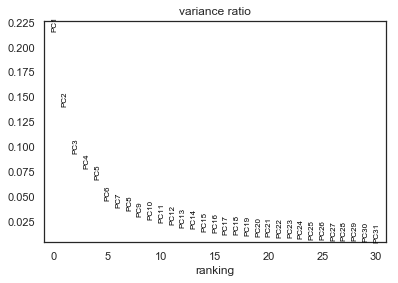

In [50]:
# Calculate PCA
sc.tl.pca(adata_n, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_n)

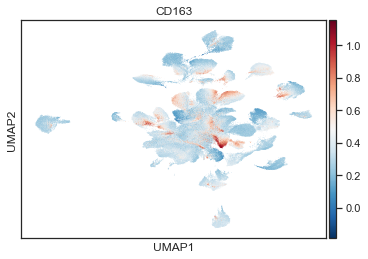

In [52]:
sc.pp.neighbors(adata_n, n_neighbors=30, n_pcs=5)
sc.tl.umap(adata_n)
sc.pl.umap(adata_n, color='CD163', color_map="RdBu_r")

In [ ]:
sc.tl.draw_graph(pdata)
sc.pl.draw_graph(pdata)

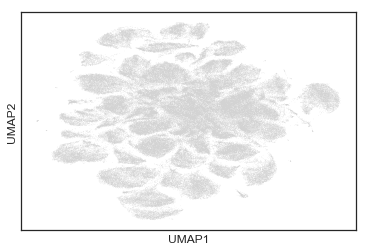

In [57]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=7)
sc.tl.umap(adata)
sc.pl.umap(adata)

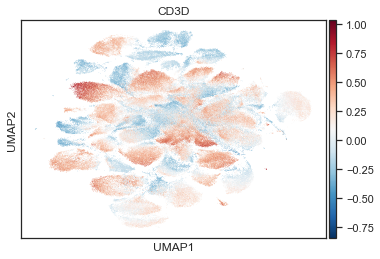

In [58]:
sc.pl.umap(adata,color='CD3D', color_map="RdBu_r")